In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# Copy from pykan, modified for better read
def B_batch(x, grid, k=0, extend=True, device='cpu'):
    grid = grid.unsqueeze(dim=2).to(device)
    x = x.unsqueeze(dim=1).to(device)

    if k == 0:
        value = (x >= grid[:, :-1]) * (x < grid[:, 1:])
    else:
        # The recurive defination come here
        B_km1 = B_batch(x[:, 0], grid=grid[:, :, 0], k=k - 1, extend=False, device=device)
        value = (x - grid[:, :-(k + 1)]) / (grid[:, k:-1] - grid[:, :-(k + 1)]) * B_km1[:, :-1] + (
                    grid[:, k + 1:] - x) / (grid[:, k + 1:] - grid[:, 1:(-k)]) * B_km1[:, 1:]
    return value

In [3]:
# Copy from pykan, modified for better read
def coef2curve(x_eval, grid, coef, k, device="cpu"):
    if coef.dtype != x_eval.dtype:
        coef = coef.to(x_eval.dtype)
    # i: batch
    # linear combination of coefficient and the basis function
    b_batch = B_batch(x_eval, grid, k, device=device)
    print("b_batch.shape", b_batch.shape) 
    y_eval = torch.einsum('ij,ijk->ik', coef, b_batch)
    return y_eval

In [4]:
# # Copy from pykan, modified for better read
# class KANLayer(torch.nn.Module):
#     def __init__(self):
#         pass

#     def forward(self, x):
#         batch = x.shape[0]
        
#         # create the input grid
#         x = torch.einsum('ij,k->ikj', x, torch.ones(self.out_dim, device=self.device)).reshape(batch, self.size).permute(1, 0)

#         # b(x)
#         base = self.base_fun(x).permute(1, 0)

#         # coef2curve() takes the input, grid, and coefficient, to output the y value
#         y = coef2curve(x_eval=x, grid=self.grid[self.weight_sharing], coef=self.coef[self.weight_sharing], k=self.k, device=self.device)  # shape (size, batch)
#         y = y.permute(1, 0)  # shape (batch, size)
        
#         # the scale factor w, and adding base with spline
#         y = self.scale_base.unsqueeze(dim=0) * base + self.scale_sp.unsqueeze(dim=0) * y
#         y = self.mask[None, :] * y
        
#         # sum across batches for training
#         y = torch.sum(y.reshape(batch, self.out_dim, self.in_dim), dim=2)  # shape (batch, out_dim)

#         return y

In [5]:
# #from kan.spline import coef2curve

# # Example usage
# num_spline = 1
# num_sample = 100
# num_grid_interval = 7
# k = 1

# # Generate random input data
# x_eval = torch.linspace(0, 1, steps=num_sample).unsqueeze(0).repeat(num_spline, 1)
# grid = torch.linspace(0, 1, steps=num_grid_interval+1).unsqueeze(0).repeat(num_spline, 1)
# # coef = torch.randn(num_spline, num_grid_interval+k)
# coef = torch.tensor([[1, 5, 3, 2, 1, 4, 4, 7]])

# # Evaluate B-spline curves
# y_eval = coef2curve(x_eval, grid, coef, k=k)

# # Plot the B-spline curves
# plt.figure(figsize=(8, 6))
# for i in range(num_spline):
#     plt.plot(x_eval[i], y_eval[i], label=f"Spline {i+1}")

# plt.title("B-spline Curves")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.legend()
# plt.grid(True)
# plt.show()

x.shape torch.Size([1, 1000])
grid.shape torch.Size([1, 8])
spline_values.shape torch.Size([1, 6, 1000])
x[0].shape torch.Size([1000])
spline_values[0, i].shape torch.Size([1000])
x[0].shape torch.Size([1000])
spline_values[0, i].shape torch.Size([1000])
x[0].shape torch.Size([1000])
spline_values[0, i].shape torch.Size([1000])
x[0].shape torch.Size([1000])
spline_values[0, i].shape torch.Size([1000])
x[0].shape torch.Size([1000])
spline_values[0, i].shape torch.Size([1000])
x[0].shape torch.Size([1000])
spline_values[0, i].shape torch.Size([1000])


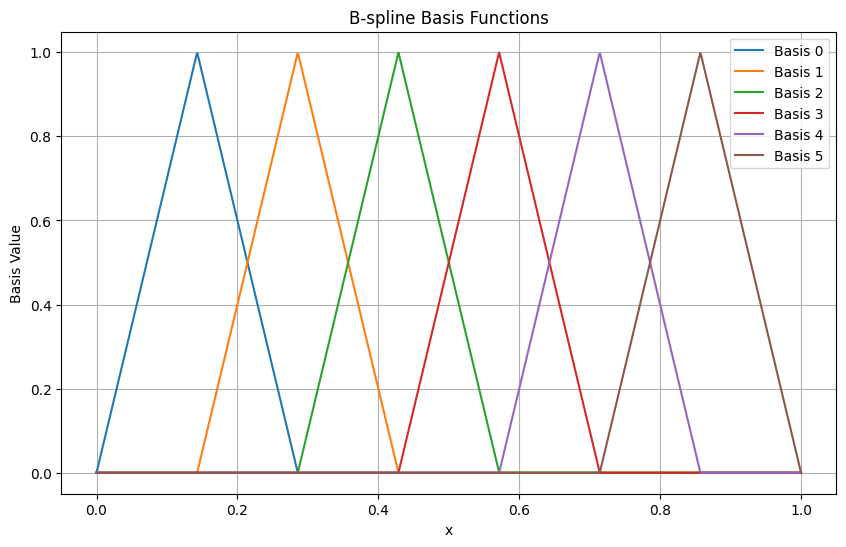

In [6]:
#from kan.spline import B_batch

# Example usage
num_spline = 1  # Number of splines
num_samples = 1000  # Number of samples
num_grid_points = 7  # Number of grid points
k = 1  # Piecewise polynomial order

# Generate input data
x = torch.linspace(0, 1, steps=num_samples).unsqueeze(0).repeat(num_spline, 1)
grid = torch.linspace(0, 1, steps=num_grid_points + 1).unsqueeze(0).repeat(num_spline, 1)

print("x.shape", x.shape)
print("grid.shape", grid.shape)

# Evaluate B-spline bases
spline_values = B_batch(x, grid, k=k, extend=True)

print("spline_values.shape", spline_values.shape)


# Plot the B-spline basis functions
plt.figure(figsize=(10, 6))
for i in range(spline_values.shape[1]):
    print("x[0].shape", x[0].shape)
    print("spline_values[0, i].shape", spline_values[0, i].shape)
    plt.plot(x[0], spline_values[0, i], label=f'Basis {i}')

plt.title('B-spline Basis Functions')
plt.xlabel('x')
plt.ylabel('Basis Value')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# #from kan.spline import B_batch
# x = torch.rand(100,2)
# grid = torch.linspace(-1,1,steps=11)[None, :].expand(2, 11)
# spline_values = B_batch(x, grid, k=3)#.shape
# print("x.shape", x.shape)
# print("grid.shape", grid.shape)
# print("spline_values.shape", spline_values.shape)


# # x.shape torch.Size([100, 2])
# # grid.shape torch.Size([2, 11])
# # spline_values.shape torch.Size([100, 2, 7])

In [8]:
# from kan.spline import B_batch
# from kan.spline import coef2curve

# Example usage
num_spline = 1
num_sample = 100
num_grid_interval = 7
k = 1

# Generate random input data
x_eval = torch.linspace(0, 1, steps=num_sample).unsqueeze(0).repeat(num_spline, 1)
grid = torch.linspace(0, 1, steps=num_grid_interval+1).unsqueeze(0).repeat(num_spline, 1)
# coef = torch.randn(num_spline, num_grid_interval+k)
coef = torch.tensor([[1, 5, 3, 2, 1, 4, 4, 7]])

print("x_eval.shape", x_eval.shape)
print("grid.shape", grid.shape)
print("coef.shape", coef.shape)

# Evaluate B-spline curves
y_eval = coef2curve(x_eval, grid, coef, k=k)

print("y_eval.shape", y_eval.shape)

# Plot the B-spline curves
plt.figure(figsize=(8, 6))
for i in range(num_spline):
    plt.plot(x_eval[i], y_eval[i], label=f"Spline {i+1}")

plt.title("B-spline Curves")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

x_eval.shape torch.Size([1, 100])
grid.shape torch.Size([1, 8])
coef.shape torch.Size([1, 8])
b_batch.shape torch.Size([1, 6, 100])


RuntimeError: einsum(): subscript j has size 6 for operand 1 which does not broadcast with previously seen size 8